This notebook supports the Fig. 6A of the Review "Blastocoel morphogenesis: a biophysics perspective" (Le Verge--Serandour, Turlier, 2021). We provide the model and the numerical code used to produce the figure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

from scipy.integrate import odeint

# Model
We consider a cell with radius $R$ and internal concentration $C_{\rm{in}}$ of a non-charged solute, immersed in a medium with concentration $C_{\rm{out}}$. The membrane of the cell allows water and solute to go through with permeation $\lambda_v$ and $\lambda_s$ respectively. This semi-permeable membrane creates an osmotic pressure $\Delta \Pi = \mathcal{R}T \left(C_{\rm{in}} - C_{\rm{out}}\right)$, given by the Van't Hoff relation. The cell has internal pressure $P_{\rm{in}}$, and external pressure is $P_{\rm{out}}$, given by the Laplace's law $\Delta P = P_{\rm{in}} - P_{\rm{out}} = \frac{2 \gamma}{R}$, where $\gamma$ is the surface tension of the membrane. 

The radius evolution is given by the water movement, generated by the competitio between osmotic pressure difference versus hydraulic pressure difference:
$$\frac{dR}{dt} = \lambda_v\left[ \mathcal{R}T \left(C_{\rm{in}} - C_{\rm{out}}\right) + \left(P_{\rm{in}} - P_{\rm{out}}\right)\right]$$
Solute is imported or exported due to chemical potential difference $\lambda_s \mathcal{R}T \log\left(\frac{C_{\rm{out}}}{C_{\rm{in}}}\right) $, or actively pumped at constant rate $j_s$ :
$$\frac{dC_{\rm{in}}}{dt} = 4 \pi R^2 \left[\lambda_s \mathcal{R}T \log\left(\frac{C_{\rm{out}}}{C_{\rm{in}}}\right) + j_s\right]$$


# Non-dimensionalized system
We solve the couple of differential equations, that describe time evolution of the non-dimensionalized cell radius $\bar{R}(t)=/R_{0}$ and non-dimensionalized cell concentration $\bar{C}(t)=C(t)/C_{\rm{out}}$ :
$$\frac{d \bar{R}}{dt} = \frac{1}{\tau_v} \left[\delta \bar{C} - \frac{\epsilon}{\bar{R}} \right]$$
$$\frac{d \delta \bar{C}}{dt} = \frac{\bar{R}^2}{\tau_s} \left[\bar{j}_s - \delta \bar{C} \right]$$
where $\delta \bar{C} = \bar{C} - 1$, the pumping constant $\bar{j}_s$, and parameter 
$$\epsilon = \frac{2\gamma/R_0}{\mathcal{R}T C_{\rm{out}}}$$
that compares hydraulic over osmotic typical pressures, the water relaxation time
$$\tau_v = \frac{R_0}{\lambda_v \mathcal{R}T C_0}$$
and solute relaxation time
$$\tau_s = \frac{C_0}{4\pi R_0^2 \lambda_s\mathcal{R}T}$$

# Stationnary state
The stationary state is given by $\dot{\bar{R}} = \dot{\bar{C}} = 0$, leading to the pumping threshold
$$\bar{j}_s^* = \frac{\epsilon}{\bar{R}}$$
Above this threshold, the cell pumps a lot of solute that makes it expanding, below, it shrinks to zero.

In [2]:
def dRdt(t, R, deltaC, eps, tauv) :
    return (deltaC - eps/R)/tauv

def dCdt(t, R, deltaC, js, taus) :
    return R**2*(js - deltaC)/taus

def f(Y, t, eps, js, taus, tauv) :
    R, deltaC = Y
    #eps, js, taus, tauv = args
    dR = dRdt(t, R, deltaC, eps, tauv)
    dC = dCdt(t, R, deltaC, js, taus)
    return [dR, dC]


Pumping threshold  js =  0.1


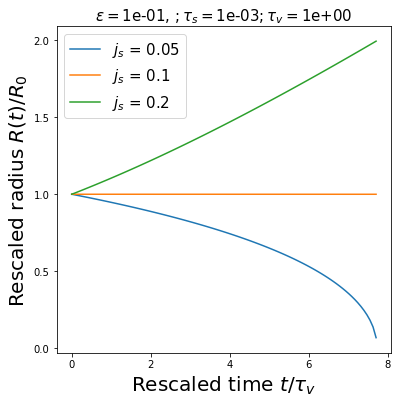

In [3]:
R0, deltaC0 = 1., 0.

eps = 1e-1
taus, tauv = 1e-3, 1.

t = np.linspace(0., 7.7, 101)

js_list = [0.05, .1, .2]

print('Pumping threshold ', 'js = ', eps/R0)

fig, ax = plt.subplots(1,1, figsize=(6,6))

for js in js_list:
    y0 = [R0, deltaC0]
    sol = odeint(f, y0, t, args=(eps, js, taus, tauv))
    ax.plot(t, sol[:, 0], label = r'$j_s$ = '+str(js))
    
ax.legend(fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))

plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=20)
plt.ylabel(r'Rescaled radius $R(t)/R_0$', fontsize=20)

plt.title(r'$\epsilon=$'+"{:2.0e}".format(eps)+r', $ ; \tau_s = $'+"{:2.0e}".format(taus)+ r'$ ; \tau_v =$'+"{:2.0e}".format(tauv), fontsize=15)
#plt.savefig('pumping_threshold.eps', format='eps')

plt.show()


We plot above the radius versus time for three cases of active pumping with the same initial conditions $\bar{R} = 1$, $\bar{C} = 1$, with parameters $\epsilon = 0.1$, $\tau_v = 1 s$, $\tau_s = 0.001 s$.

The pumping threshold is $\bar{j}^*_s = 0.1$.